In [3]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

In [4]:
import re

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())


In [5]:
tokens = tokenize(text)

In [6]:
tokens

['machine',
 'learning',
 'is',
 'the',
 'study',
 'of',
 'computer',
 'algorithms',
 'that',
 'improve',
 'automatically',
 'through',
 'experience',
 'it',
 'is',
 'seen',
 'as',
 'a',
 'subset',
 'of',
 'artificial',
 'intelligence',
 'machine',
 'learning',
 'algorithms',
 'build',
 'a',
 'mathematical',
 'model',
 'based',
 'on',
 'sample',
 'data',
 'known',
 'as',
 'training',
 'data',
 'in',
 'order',
 'to',
 'make',
 'predictions',
 'or',
 'decisions',
 'without',
 'being',
 'explicitly',
 'programmed',
 'to',
 'do',
 'so',
 'machine',
 'learning',
 'algorithms',
 'are',
 'used',
 'in',
 'a',
 'wide',
 'variety',
 'of',
 'applications',
 'such',
 'as',
 'email',
 'filtering',
 'and',
 'computer',
 'vision',
 'where',
 'it',
 'is',
 'difficult',
 'or',
 'infeasible',
 'to',
 'develop',
 'conventional',
 'algorithms',
 'to',
 'perform',
 'the',
 'needed',
 'tasks']

In [7]:
len(tokens)

84

In [8]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    return word_to_id, id_to_word

In [9]:
word_to_id, id_to_word = mapping(tokens)

In [13]:
import numpy as np

def generate_training_data(tokens, window_size_left, dataset_method):
    x = []
    y = []

    if dataset_method == 'skipgram':
        for i in range(window_size_left, len(tokens) - (window_size_left)):
            for j in range(-window_size_left, window_size_left + 1):
                if j != 0:
                    x.append(tokens[i])
                    y.append(tokens[i + j])
    
    if dataset_method == 'sliding_window':
        for i in range(1, len(tokens) - (window_size_left)):
            for j in range(window_size_left):
                x.append(tokens[i])
                y.append(tokens[i+j+1])

    return x, y

In [14]:
x, y = generate_training_data(tokens, window_size_left=2, dataset_method='sliding_window')

In [11]:
def dataset_to_id(x, y, word_to_id):
    for i in range(len(x)):
        x[i] = word_to_id[x[i]]
        y[i] = word_to_id[y[i]]
    
    return x, y

In [12]:
x, y = dataset_to_id(x, y, word_to_id)

In [13]:
x = np.array(x)
y = np.array(y)

In [14]:
def one_hot_encoding(data, vocab_size):
    ohe = []
    for i in range(len(data)):
        each_data = [0]*vocab_size
        print(data[i])
        each_data[data[i]] = 1
        ohe.append(each_data)

    return ohe

In [15]:
x_ohe = np.array(one_hot_encoding(x, len(word_to_id)))
y_ohe = np.array(one_hot_encoding(y, len(word_to_id)))

19
19
19
19
40
40
40
40
23
23
23
23
44
44
44
44
9
9
9
9
28
28
28
28
6
6
6
6
4
4
4
4
27
27
27
27
17
17
17
17
58
58
58
58
59
59
59
59
19
19
19
19
49
49
49
49
37
37
37
37
31
31
31
31
8
8
8
8
44
44
44
44
7
7
7
7
35
35
35
35
3
3
3
3
24
24
24
24
28
28
28
28
43
43
43
43
31
31
31
31
54
54
54
54
13
13
13
13
55
55
55
55
16
16
16
16
33
33
33
33
52
52
52
52
10
10
10
10
37
37
37
37
22
22
22
22
52
52
52
52
50
50
50
50
32
32
32
32
2
2
2
2
45
45
45
45
25
25
25
25
57
57
57
57
47
47
47
47
15
15
15
15
38
38
38
38
14
14
14
14
39
39
39
39
2
2
2
2
30
30
30
30
11
11
11
11
3
3
3
3
24
24
24
24
28
28
28
28
1
1
1
1
56
56
56
56
50
50
50
50
31
31
31
31
41
41
41
41
12
12
12
12
44
44
44
44
0
0
0
0
46
46
46
46
37
37
37
37
20
20
20
20
48
48
48
48
36
36
36
36
9
9
9
9
34
34
34
34
53
53
53
53
59
59
59
59
19
19
19
19
42
42
42
42
57
57
57
57
5
5
5
5
2
2
2
2
18
18
18
18
51
51
51
51
28
28
28
28
2
2
2
2
21
21
21
21
40
40
40
40
3
24
40
23
24
19
23
44
19
40
44
9
40
23
9
28
23
44
28
6
44
9
6
4
9
28
4
27
28
6
27
17
6
4
17
58
4
27

# Forward Prop

In [16]:
def init_weights(vocab_size, n_embed):
    model = {
        'w1': np.random.randn(vocab_size, n_embed),
        'w2': np.random.randn(n_embed, vocab_size)
    }

    return model

In [17]:
model = init_weights(len(word_to_id), 50)

In [18]:
def softmax(output):
    soft = []
    for each_output in output:
        soft.append(np.exp(each_output)/np.exp(each_output).sum())
    
    return np.array(soft)

In [19]:
def forward_prop(model, x):
    outputs = {}

    outputs['embed'] = x @ model['w1']
    outputs['output'] = outputs['embed'] @ model['w2']
    outputs['softmax'] = softmax(outputs['output'])

    return outputs

In [20]:
outputs = forward_prop(model, x_ohe)

In [21]:
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

In [22]:
def backward(model, X, y, alpha):
    cache  = forward_prop(model, X)
    da2 = cache["softmax"] - y
    dw2 = cache["embed"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["softmax"], y)

In [23]:
learning = one_hot_encoding([word_to_id["learning"]], len(word_to_id))
result = forward_prop(model, learning)

24


In [168]:
result['softmax']

array([[7.09044914e-09, 9.50358851e-04, 4.44198672e-03, 3.31521363e-04,
        1.48569724e-09, 3.18968309e-10, 5.94028105e-02, 7.24939165e-03,
        7.09736707e-02, 8.32494311e-05, 7.71162075e-09, 3.43584526e-01,
        4.82795685e-08, 2.21767707e-02, 7.62199409e-02, 1.56479245e-02,
        8.96537421e-06, 2.22971569e-09, 2.75043757e-05, 3.98792334e-07,
        9.05834464e-06, 2.11015772e-04, 4.19760322e-05, 3.55751174e-05,
        3.82258467e-05, 2.60076833e-04, 1.48344147e-09, 8.48570453e-06,
        2.19980324e-08, 4.33223459e-10, 3.95962383e-10, 7.15133967e-04,
        4.40071151e-06, 1.86882735e-05, 1.07409782e-06, 6.70668344e-03,
        2.24603365e-09, 8.98438819e-07, 1.31770969e-02, 1.46890341e-06,
        7.49927072e-04, 3.37150257e-06, 4.39482042e-03, 2.62622894e-08,
        2.31996126e-03, 1.54976413e-02, 1.16806008e-06, 1.64467120e-03,
        6.13205981e-06, 1.08888138e-03, 7.23667451e-08, 1.31325165e-04,
        2.43886688e-09, 2.23845330e-07, 2.77170140e-07, 2.031683

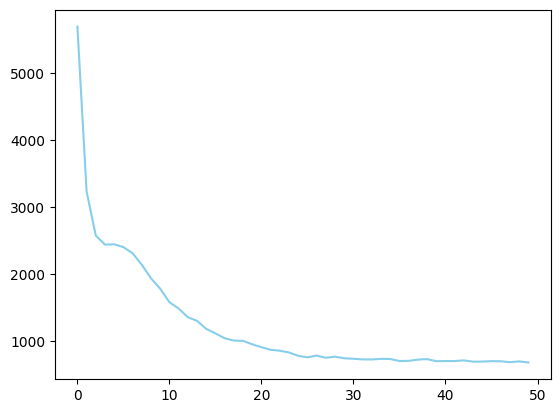

In [24]:
import matplotlib.pyplot as plt

n_iter = 50
learning_rate = 0.05

history = [backward(model, x_ohe, y_ohe, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [162]:
history

[np.float64(5205.263530565446),
 np.float64(3090.325723327691),
 np.float64(2381.6905196941266),
 np.float64(2149.2257461120757),
 np.float64(2089.569382333696),
 np.float64(2021.6109145201995),
 np.float64(1932.2062581180694),
 np.float64(1812.417750265036),
 np.float64(1665.0539637323202),
 np.float64(1561.9382597779263),
 np.float64(1470.3428842072547),
 np.float64(1346.5139562696907),
 np.float64(1293.8681274136682),
 np.float64(1197.9672132425458),
 np.float64(1176.18758873991),
 np.float64(1105.8562524489464),
 np.float64(1022.6572676013161),
 np.float64(899.9740256725538),
 np.float64(840.2742725198223),
 np.float64(811.2700095190592),
 np.float64(787.3964334306098),
 np.float64(769.5287729797242),
 np.float64(812.0427570088506),
 np.float64(797.8752645634374),
 np.float64(781.7186480720552),
 np.float64(759.3493072877046),
 np.float64(750.216904154108),
 np.float64(750.3295620215197),
 np.float64(743.4979001391432),
 np.float64(738.0336480229766),
 np.float64(739.2514923708122)

In [170]:
word = 'learning'

x = one_hot_encoding([word_to_id[word]], len(word_to_id))
result = forward_prop(model, x)

46


In [177]:
result['softmax'][0]

array([3.44760909e-01, 7.63486626e-04, 1.46025194e-01, 7.22222298e-02,
       3.92277582e-04, 3.71424262e-04, 3.52691271e-04, 2.07708944e-04,
       2.11382963e-04, 3.52791062e-04, 2.46128798e-05, 2.57710664e-04,
       1.80745111e-04, 4.78965671e-04, 5.60166608e-04, 2.59535409e-04,
       2.34741032e-05, 3.26906078e-04, 3.99747657e-04, 1.41783723e-04,
       2.26880490e-04, 2.27383250e-04, 1.23066604e-04, 4.91319360e-05,
       3.21795931e-04, 6.82627348e-04, 3.35071029e-04, 2.91143916e-04,
       2.56574503e-04, 7.74715585e-05, 2.54114863e-04, 1.51100410e-04,
       2.66468531e-04, 2.67146243e-04, 2.81637907e-04, 1.30380560e-01,
       1.64243550e-04, 2.75591601e-04, 2.92805312e-04, 2.41841934e-04,
       1.64785169e-04, 9.73384317e-05, 6.31116622e-04, 8.81101193e-05,
       2.84165613e-04, 7.41343507e-04, 7.71448723e-04, 1.00290167e-04,
       8.51211552e-05, 2.04662714e-04, 2.66394382e-05, 2.97786333e-04,
       1.47877068e-04, 3.10177242e-04, 1.14068936e-04, 4.61543354e-04,
      

In [183]:
def inference(word, id_to_word, model):
    x = one_hot_encoding([word_to_id[word]], len(word_to_id))
    result = forward_prop(model, x)

    probabs = result['softmax'][0]

    output_words = [id_to_word[x] for x in np.argsort(probabs)]
    output_word_probs = -np.sort(-probabs)


    return output_words, output_word_probs

In [184]:
output_words, output_word_probs = inference('learning', id_to_word, model)

46


In [185]:
print(f'{output_word_probs=}, {output_words=}')

output_word_probs=array([3.44760909e-01, 1.50901883e-01, 1.46025194e-01, 1.40478283e-01,
       1.30380560e-01, 7.22222298e-02, 7.71448723e-04, 7.63486626e-04,
       7.41343507e-04, 6.82627348e-04, 6.31116622e-04, 5.60166608e-04,
       4.78965671e-04, 4.61543354e-04, 3.99747657e-04, 3.92277582e-04,
       3.71424262e-04, 3.52791062e-04, 3.52691271e-04, 3.35071029e-04,
       3.26906078e-04, 3.21795931e-04, 3.20838063e-04, 3.10177242e-04,
       2.97786333e-04, 2.92805312e-04, 2.92121565e-04, 2.91143916e-04,
       2.84165613e-04, 2.81637907e-04, 2.75591601e-04, 2.67146243e-04,
       2.66468531e-04, 2.59535409e-04, 2.57710664e-04, 2.56574503e-04,
       2.54114863e-04, 2.41841934e-04, 2.27383250e-04, 2.26880490e-04,
       2.11382963e-04, 2.07708944e-04, 2.04662714e-04, 1.80745111e-04,
       1.64785169e-04, 1.64243550e-04, 1.51100410e-04, 1.47877068e-04,
       1.41783723e-04, 1.23066604e-04, 1.14068936e-04, 1.00290167e-04,
       9.73384317e-05, 8.81101193e-05, 8.51211552e-05, 7.74

In [190]:
def gen_text(start_word, num_gens):
    gen = []

    for i in range(num_gens):
        gen.append(start_word)
        output_words, _ = inference(start_word, id_to_word, model)
        start_word = output_words[0]

    return gen

In [192]:
gen = gen_text('machine', 200)

output_str = ''
for i in range(len(gen)):
    output_str += f'{gen[i]} '

0
59
18
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9
50
29
45
32
7
37
13
43
42
2
56
48
9


In [195]:
output_str

'machine training where being seen without of vision a study order mathematical and programmed are intelligence being seen without of vision a study order mathematical and programmed are intelligence being seen without of vision a study order mathematical and programmed are intelligence being seen without of vision a study order mathematical and programmed are intelligence being seen without of vision a study order mathematical and programmed are intelligence being seen without of vision a study order mathematical and programmed are intelligence being seen without of vision a study order mathematical and programmed are intelligence being seen without of vision a study order mathematical and programmed are intelligence being seen without of vision a study order mathematical and programmed are intelligence being seen without of vision a study order mathematical and programmed are intelligence being seen without of vision a study order mathematical and programmed are intelligence being se

In [2]:
with open('Harry_Potter_all_books_preprocessed.txt', 'r') as text:
    training_text = text.read()

In [3]:
import train

In [6]:
train.Main(
        window_size_left=5,
        learning_rate=0.02,
        n_iter=50,        
        n_embed=500,
        output_folder="model/",
        start_word="machine",
        num_gens=200,
        is_train=True,
        dataset_method="sliding_window",
        training_text=training_text,
    )
